# Crop Recommendation

Data: [Link](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset)

**Atrributes:**


*   N - ratio of Nitrogen (NH4+) content in soil
*   P - ratio of Phosphorous (P) content in soil
*   K - ratio of Potassium (K) content in soil
*   temperature
*   humidity
*   ph
*   rainfall

**Target**

Recommended crop

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Liberaries

In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import json
import joblib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Get the Data

In [3]:
data = pd.read_csv("/content/drive/MyDrive/AgriWise/ML/crop-recommendation/Crop_recommendation1.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Data Discovering

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
data.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [ ]:
print("Data shape: ", data.shape)

Data shape:  (2200, 8)


In [ ]:
cropNames = data['label'].unique()
print("Number of crop names = ", len(cropNames))

Number of crop names =  22


In [ ]:
print("Crop names are ", cropNames)

Crop names are  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
cropMeanValue = pd.pivot_table(data, index=['label'], aggfunc='mean')
cropMeanValue.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


### Elements Analysis

In [ ]:
colorArray = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d', '#127800', '#a8812c', '#027da6', '#3d6636']

In [ ]:
def analyzeElements(values, code, name):
  fig = make_subplots(rows=1, cols=2)

  top = {
      'y' : values[code][0:10].sort_values().index,
      'x' : values[code][0:10].sort_values()
  }

  last = {
      'y' : values[code][-10:].index,
      'x' : values[code][-10:]
  }

  fig.add_trace(
      go.Bar(top,
            name="Most "+name+" required",
            marker_color=random.choice(colorArray),
            orientation='h',
            text=top['x']),
      
      row=1, col=1
  )

  fig.add_trace(
      go.Bar(last,
            name="Least "+name+" required",
            marker_color=random.choice(colorArray),
            orientation='h',
            text=last['x']),
      row=1, col=2
  )
  fig.update_traces(texttemplate='%{text}', textposition='inside')
  fig.update_layout(title_text=name,
                    plot_bgcolor='white',
                    font_size=12, 
                    font_color='black',
                  height=500)

  fig.update_xaxes(showgrid=False)
  fig.update_yaxes(showgrid=False)
  fig.show()

**Nitrogen Analysis**


In [ ]:
Nitrogen = cropMeanValue.sort_values(by='N', ascending=False)
analyzeElements(Nitrogen, 'N', "Nitrogen")

**Phosphorus Analysis**


In [ ]:
Phosphorus=cropMeanValue.sort_values(by='P', ascending=False)
analyzeElements(Phosphorus,'P', "Phosphorus")

**Potassium analysis**

In [ ]:
Potassium=cropMeanValue.sort_values(by='K', ascending=False)
analyzeElements(Potassium, 'K', "Potassium")

### Ratio of elements for some crops

In [ ]:
def plotElementRatio(name):
  labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
  elementNPK = cropMeanValue[cropMeanValue.index==name]
  sizes = [elementNPK['N'][0], elementNPK['P'][0], elementNPK['K'][0]]

  fig, ax = plt.subplots(figsize=(5, 5))
  ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#ffb3dd', '#99ddff', '#aaff94'])
  plt.title(name)
  plt.show()

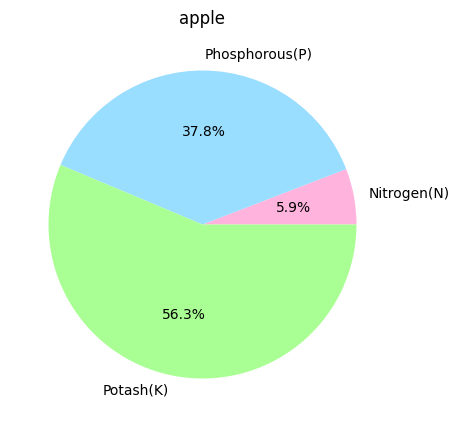

In [ ]:
plotElementRatio('apple')

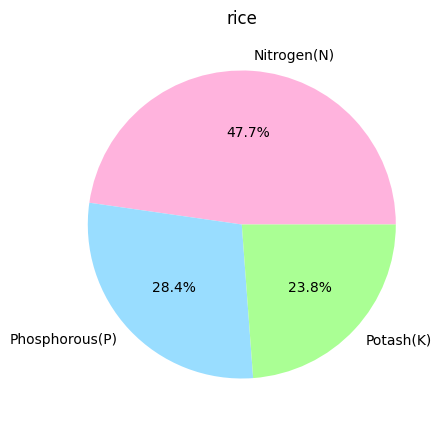

In [ ]:
plotElementRatio('rice')

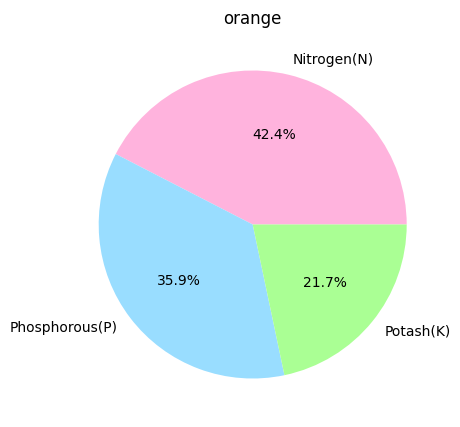

In [ ]:
plotElementRatio('orange')

### Comparision between rainfall, temerature and humidity

In [ ]:
fig = px.bar(cropMeanValue, x=cropMeanValue.index, y=["rainfall", "temperature", "humidity"], color_discrete_map={
        'rainfall': '#1f77b4',
        'temperature': 'darkgray',
        'humidity':'goldenrod'
    })
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

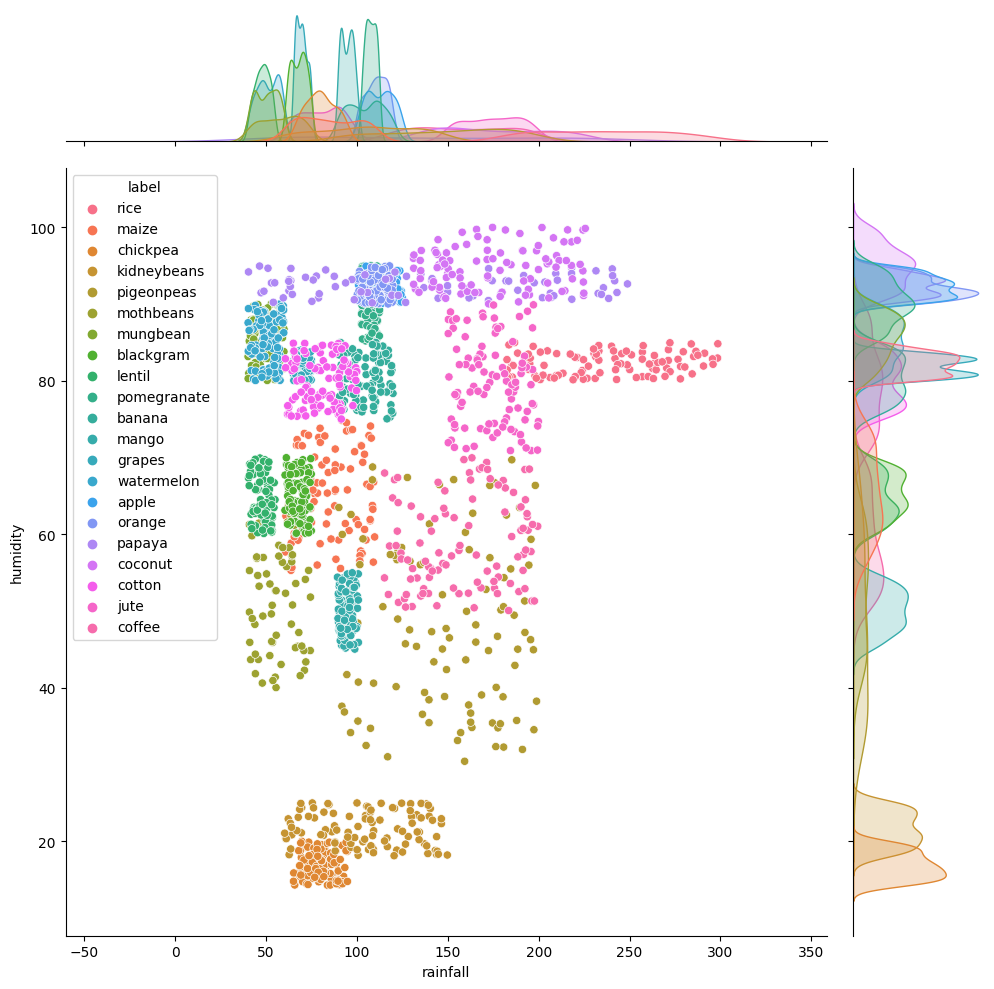

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=data[(data['temperature']<40) & 
                                                  (data['rainfall']>40)],height=10,hue="label")

### Correlation between features

<ipython-input-177-03ff58e1d2c6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



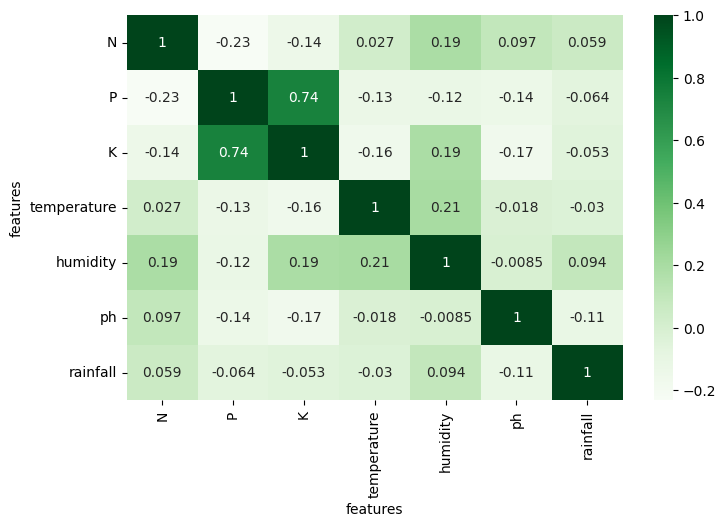

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap="Greens")
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.show()

In [38]:
dataNoDuplicates = data.copy()
dataNoDuplicates.drop_duplicates()
print(dataNoDuplicates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [57]:
features = dataNoDuplicates.drop('label', axis=1)
labels = dataNoDuplicates['label']

### Split dataset into train and test 

In [58]:
trainFeatures, validationFeatures, trainTarget, validationTarget = train_test_split(features, labels, test_size = 0.2,
                                                    shuffle = True, random_state = 42)

In [41]:
trainFeatures.head()

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725


In [42]:
validationFeatures.head()

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465


In [43]:
trainTarget.head()

1656       orange
752     blackgram
892        lentil
1041       banana
1179        mango
Name: label, dtype: object

In [44]:
validationTarget.head()

1451     muskmelon
1334    watermelon
1761        papaya
1735        papaya
1576         apple
Name: label, dtype: object

# Choosing the model

In [65]:
trainAccList = []
validationAccList = []
modelList = []

**RandomForest**

In [66]:
RandomForestClf = RandomForestClassifier(random_state=0)
RandomForestClf.fit(trainFeatures, trainTarget)

RandomForestTrainAcc = RandomForestClf.score(trainFeatures, trainTarget)
RandomForestPreds = RandomForestClf.predict(validationFeatures)
RandomForestValAcc = metrics.accuracy_score(validationTarget, RandomForestPreds)

trainAccList.append(RandomForestTrainAcc * 100)
validationAccList.append(RandomForestValAcc * 100)
modelList.append('RandomForestClf')

print("     RandomForest Train Accuracy = ", RandomForestTrainAcc * 100)
print("     Random Forest Validation Accuracy = ", RandomForestValAcc * 100)
print("--------------------------------------------------------------")
print(metrics.classification_report(validationTarget, RandomForestPreds))

     RandomForest Train Accuracy =  100.0
     Random Forest Validation Accuracy =  99.31818181818181
--------------------------------------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00 

In [67]:
score = cross_val_score(RandomForestClf, features, labels, cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99090909 0.99772727 0.99545455 0.98636364]


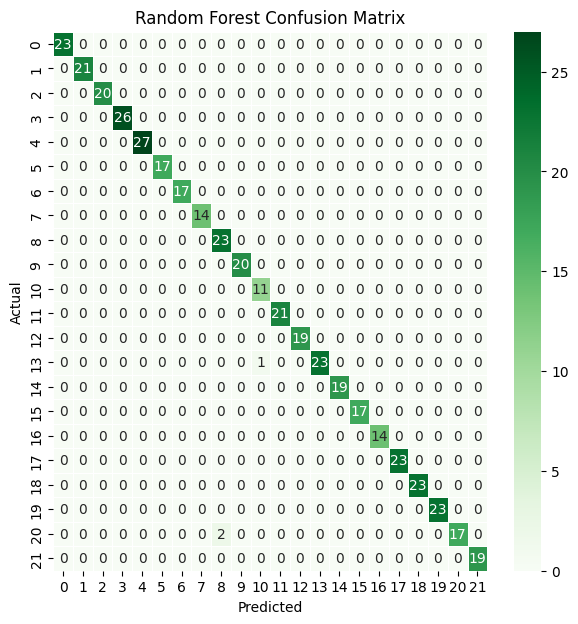

In [68]:
comfusionMatrixRF = confusion_matrix(validationTarget, RandomForestPreds)
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(comfusionMatrixRF, annot=True, linewidth=0.5, fmt=".0f",  cmap='Greens', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Random Forest Confusion Matrix')
plt.show()

**NaiveBayes**

In [69]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(trainFeatures, trainTarget)

NaiveBayesTrainAcc = NaiveBayes.score(trainFeatures, trainTarget)
NaiveBayesPreds = NaiveBayes.predict(validationFeatures)
NaiveBayesValAcc = metrics.accuracy_score(validationTarget, NaiveBayesPreds)

trainAccList.append(NaiveBayesTrainAcc * 100)
validationAccList.append(NaiveBayesValAcc * 100)
modelList.append('NaiveBayes')

print("     Naive Bayes Train Accuracy = ", NaiveBayesTrainAcc * 100)
print("     Random Forest Validation Accuracy = ",  NaiveBayesValAcc * 100)
print("--------------------------------------------------------------")
print(metrics.classification_report(validationTarget, NaiveBayesPreds))

     Naive Bayes Train Accuracy =  99.48863636363636
     Random Forest Validation Accuracy =  99.54545454545455
--------------------------------------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean 

In [70]:
score = cross_val_score(NaiveBayes, features, labels, cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


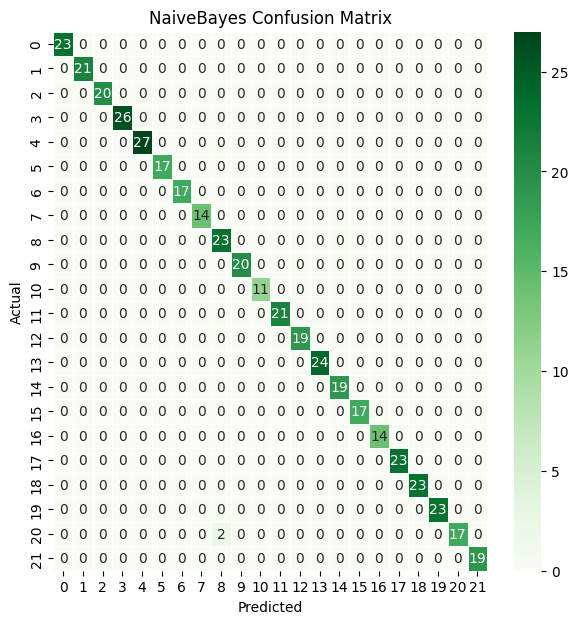

In [ ]:
ConfusionMatrixNB = confusion_matrix(validationTarget, NaiveBayesPreds)
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(ConfusionMatrixNB, annot=True, linewidth=0.5, fmt=".0f",  cmap='Greens', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('NaiveBayes Confusion Matrix')
plt.show()

**SVM**

In [72]:
SVM = SVC(gamma='auto')
SVM.fit(trainFeatures, trainTarget)

SVMtrainAcc = SVM.score(trainFeatures, trainTarget)
SVMPreds = SVM.predict(validationFeatures)
SVMvalAcc = metrics.accuracy_score(validationTarget, SVMPreds)

trainAccList.append(SVMtrainAcc * 100)
validationAccList.append(SVMvalAcc * 100)
modelList.append('SVM')

print("     SVM Train Accuracy = ", SVMtrainAcc * 100)
print("     SVM Validation Accuracy = ", SVMvalAcc * 100)
print("--------------------------------------------------------------")
print(metrics.classification_report(validationTarget, SVMPreds))

     SVM Train Accuracy =  100.0
     SVM Validation Accuracy =  9.090909090909092
--------------------------------------------------------------
              precision    recall  f1-score   support

       apple       1.00      0.13      0.23        23
      banana       1.00      0.05      0.09        21
   blackgram       1.00      0.05      0.10        20
    chickpea       0.00      0.00      0.00        26
     coconut       1.00      0.07      0.14        27
      coffee       1.00      0.06      0.11        17
      cotton       1.00      0.18      0.30        17
      grapes       1.00      0.07      0.13        14
        jute       1.00      0.04      0.08        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.03      1.00      0.05        11
       maize       0.00      0.00      0.00        21
       mango       1.00      0.11      0.19        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      0.11      0.19

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
score = cross_val_score(SVM, features, labels, cv=5)
print('Cross validation score: ', score)

Cross validation score:  [0.27727273 0.28863636 0.29090909 0.275      0.26818182]


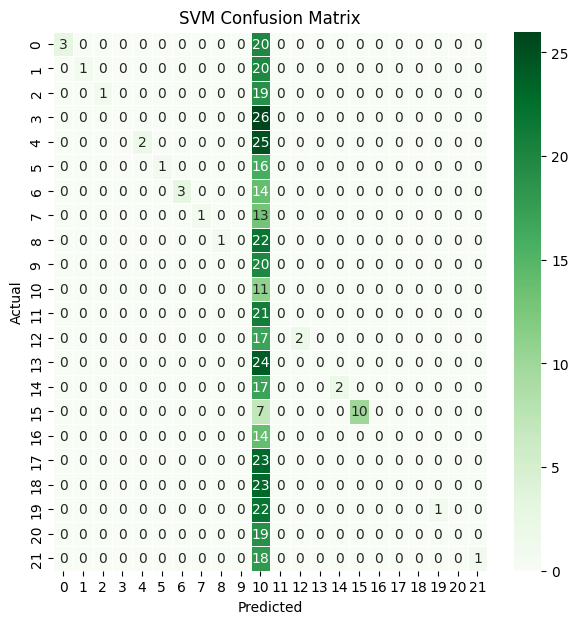

In [ ]:
ConfusionMatrixSVM = confusion_matrix(validationTarget, SVMPreds)
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(ConfusionMatrixSVM, annot=True, linewidth=0.5, fmt=".0f",  cmap='Greens', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('SVM Confusion Matrix')
plt.show()

**Logistic Regression**

In [73]:
logReg = LogisticRegression(random_state=2)
logReg.fit(trainFeatures, trainTarget)

logRegTrainAcc = logReg.score(trainFeatures, trainTarget)
logRegPreds = logReg.predict(validationFeatures)
logRegValAcc = metrics.accuracy_score(validationTarget, logRegPreds)

trainAccList.append(logRegTrainAcc * 100)
validationAccList.append(logRegValAcc * 100)
modelList.append('logReg')

print("     Logistic Regression Train Accuracy = ", logRegTrainAcc * 100)
print("     Logistic Regression Validation Accuracy = ", logRegValAcc * 100)
print("--------------------------------------------------------------")
print(metrics.classification_report(validationTarget, logRegPreds))

     Logistic Regression Train Accuracy =  97.61363636363637
     Logistic Regression Validation Accuracy =  94.54545454545455
--------------------------------------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


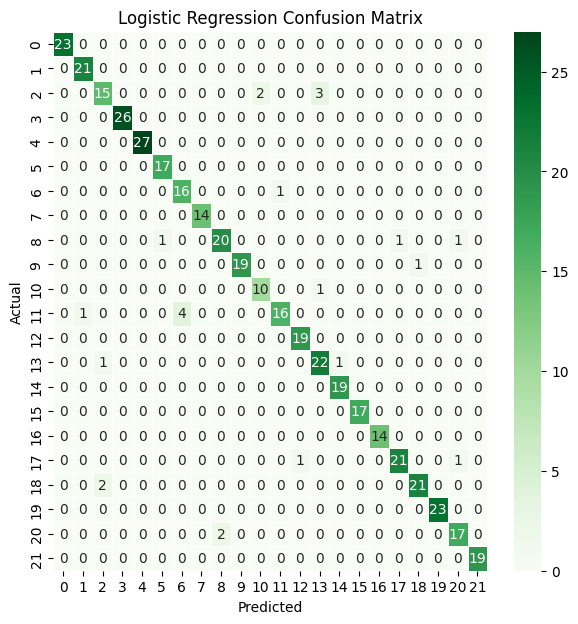

In [ ]:
ConfusionMatrixLR = confusion_matrix(validationTarget, logRegPreds)
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(ConfusionMatrixLR, annot=True, linewidth=0.5, fmt=".0f",  cmap='Greens', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Logistic Regression Confusion Matrix')
plt.show()

**DecisionTree**

In [75]:
decisionTreeClf = DecisionTreeClassifier(random_state=42)
decisionTreeClf.fit(trainFeatures, trainTarget)

decisionTreeTrainAcc = decisionTreeClf.score(trainFeatures, trainTarget)
decisionTreePreds = decisionTreeClf.predict(validationFeatures)
decisionTreeValAcc = metrics.accuracy_score(validationTarget, decisionTreePreds)


trainAccList.append(decisionTreeTrainAcc * 100)
validationAccList.append(decisionTreeValAcc * 100)
modelList.append('decisionTreeClf')

print("     Decision Tree Train Accuracy = ", decisionTreeTrainAcc * 100)
print("     Decision Tree Validaion Accuracy = ", decisionTreeValAcc * 100)
print("--------------------------------------------------------------")
print(metrics.classification_report(validationTarget, decisionTreePreds))

     Decision Tree Train Accuracy =  100.0
     Decision Tree Validaion Accuracy =  98.63636363636363
--------------------------------------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00 

In [76]:
score = cross_val_score(decisionTreeClf, features, labels, cv=5)
print('Cross validation score: ', score)

Cross validation score:  [0.98409091 0.98409091 0.99090909 0.99090909 0.98409091]


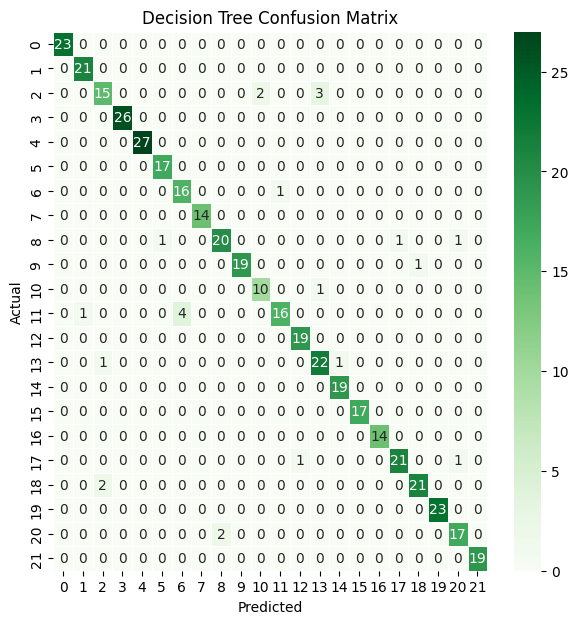

In [ ]:
ConfusionMatrixDT = confusion_matrix(validationTarget, decisionTreePreds)
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(ConfusionMatrixLR, annot=True, linewidth=0.5, fmt=".0f",  cmap='Greens', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Pros & Cons
**Random Forest Classifier**

* quite fast
* able to deal with unbalanced and missing data
* may over-fit data sets that are particularly noisy
* data-hungry

**GaussianNB**

* very fast
* better than other models with less training data if the assumption of  independence of features holds
* If you have categorical input variables, the Naive Bayes algorithm performs exceptionally well in comparison to numerical variables
* effectively works in Multi-class predictions.

**SVC**

* clear margin of separation between classes
* more effective in high dimensional spaces
* effective in cases where the number of dimensions is greater than the number of samples
* memory efficient
* not suitable for large data sets

**Logistic Regression**
* simple
* not effecient when not lineary seperable features
* sensetive to outliers

**DecisionTreeClassifier**

* does not require normalization of data
* does not require scaling of data as well
* higher time to train the model

### Accuracy Comparison

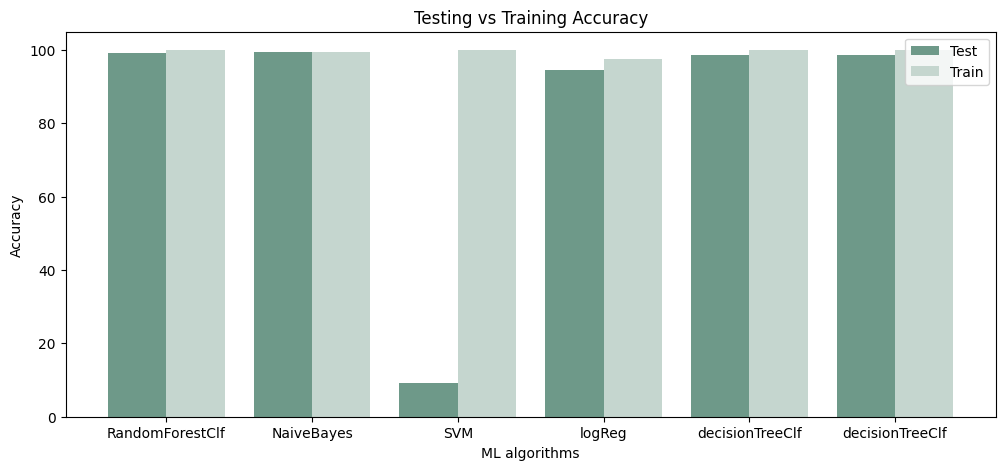

In [82]:
f, ax = plt.subplots(figsize=(12, 5)) 
X_axis = np.arange(len(modelList))
plt.bar(X_axis - 0.2, validationAccList, 0.4, label = 'Test', color=('#6e9989'))
plt.bar(X_axis + 0.2, trainAccList, 0.4, label = 'Train', color=('#c5d6cf'))
plt.xticks(X_axis, modelList)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
plt.savefig('cropRecommendation.png')
plt.show()

# Testing

In [81]:
test = RandomForestClf.predict([[90, 42, 43, 20.879744, 75, 5.5, 220]])

print("Test Output: ", test)

Test Output:  ['rice']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
